# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
# Code Here
!pip install palmerpenguins
import palmerpenguins as penguin
penguins = penguin.load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [2]:
penguins.dropna(inplace=True)
print("DataFrame after dropping rows with missing values:")
penguins.info()

DataFrame after dropping rows with missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [3]:
import pandas as pd
penguins_dummified = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)
print("DataFrame after dummification:")
penguins_dummified.head()

DataFrame after dummification:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False
5,39.3,20.6,190.0,3650.0,2007,False,False,False,True,True


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [11]:
from sklearn.model_selection import train_test_split

y = penguins['species']
X = penguins_dummified.drop(columns=['species_Chinstrap', 'species_Gentoo'])

#train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# KNeighborsClassifier with n_neighbors=3
knn3_model = KNeighborsClassifier(n_neighbors=3)
knn3_model.fit(X_train, y_train)

# predict
y_pred_knn3 = knn3_model.predict(X_test)

# confusion matrix
print("\nConfusion Matrix (K=3):\n", confusion_matrix(y_test, y_pred_knn3))

# accuracy score
accuracy_knn3 = accuracy_score(y_test, y_pred_knn3)
print(f"\nOverall Accuracy (K=3): {accuracy_knn3:.4f}")

# classification report
print("\nClassification Report (K=3):\n", classification_report(y_test, y_pred_knn3))

# predicted probabilites
y_proba_knn3 = knn3_model.predict_proba(X_test)

#auc score
auc_score = roc_auc_score(y_test, y_proba_knn3, multi_class="ovr")
print("Overall OvR AUC:", auc_score)



Confusion Matrix (K=3):
 [[23  1  5]
 [ 6  7  1]
 [ 3  0 21]]

Overall Accuracy (K=3): 0.7612

Classification Report (K=3):
               precision    recall  f1-score   support

      Adelie       0.72      0.79      0.75        29
   Chinstrap       0.88      0.50      0.64        14
      Gentoo       0.78      0.88      0.82        24

    accuracy                           0.76        67
   macro avg       0.79      0.72      0.74        67
weighted avg       0.77      0.76      0.75        67

Overall OvR AUC: 0.8469910025829934


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np

#KNeighborsClassifier with n_neighbors=7
knn7_model = KNeighborsClassifier(n_neighbors=7)
knn7_model.fit(X_train, y_train)

# predict
y_pred_knn7 = knn7_model.predict(X_test)

# confusion matrix
print("\nConfusion Matrix (K=7):\n", confusion_matrix(y_test, y_pred_knn7))

# accuracy score
accuracy_knn7 = accuracy_score(y_test, y_pred_knn7)
print(f"\nOverall Accuracy (K=7): {accuracy_knn7:.4f}")
print("\nClassification Report (K=7):\n", classification_report(y_test, y_pred_knn7))

#predicted probabilites
y_proba_knn7 = knn7_model.predict_proba(X_test)

#auc score
auc_score = roc_auc_score(y_test, y_proba_knn7, multi_class="ovr")
print("Overall OvR AUC:", auc_score)


Confusion Matrix (K=7):
 [[25  2  2]
 [ 9  4  1]
 [ 2  0 22]]

Overall Accuracy (K=7): 0.7612

Classification Report (K=7):
               precision    recall  f1-score   support

      Adelie       0.69      0.86      0.77        29
   Chinstrap       0.67      0.29      0.40        14
      Gentoo       0.88      0.92      0.90        24

    accuracy                           0.76        67
   macro avg       0.75      0.69      0.69        67
weighted avg       0.76      0.76      0.74        67

Overall OvR AUC: 0.8897650376097856


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# DecisionTreeClassifier with max_depth=3
dt3_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt3_model.fit(X_train, y_train)

# predict
y_pred_dt3 = dt3_model.predict(X_test)

# confusion matrix
print("\nConfusion Matrix (max_depth=3):\n", confusion_matrix(y_test, y_pred_dt3))

# accuracy score
accuracy_dt3 = accuracy_score(y_test, y_pred_dt3)
print(f"\nOverall Accuracy (max_depth=3): {accuracy_dt3:.4f}")

# classification report
print("\nClassification Report (max_depth=3):\n", classification_report(y_test, y_pred_dt3))

# predicted probabilites
y_proba_dt3 = dt3_model.predict_proba(X_test)

#auc score
auc_score = roc_auc_score(y_test, y_proba_dt3, multi_class="ovr")
print("Overall OvR AUC:", auc_score)



Confusion Matrix (max_depth=3):
 [[29  0  0]
 [ 1 13  0]
 [ 2  0 22]]

Overall Accuracy (max_depth=3): 0.9552

Classification Report (max_depth=3):
               precision    recall  f1-score   support

      Adelie       0.91      1.00      0.95        29
   Chinstrap       1.00      0.93      0.96        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.96        67
   macro avg       0.97      0.95      0.96        67
weighted avg       0.96      0.96      0.96        67

Overall OvR AUC: 0.9681180151636953


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# DecisionTreeClassifier with max_depth=7
dt7_model = DecisionTreeClassifier(max_depth=7, random_state=42)
dt7_model.fit(X_train, y_train)

# predict
y_pred_dt7 = dt7_model.predict(X_test)

# confusion matrix
print("\nConfusion Matrix (max_depth=7):\n", confusion_matrix(y_test, y_pred_dt7))

# accuracy score
accuracy_dt7 = accuracy_score(y_test, y_pred_dt7)
print(f"\nOverall Accuracy (max_depth=7): {accuracy_dt7:.4f}")

# classification report
print("\nClassification Report (max_depth=7):\n", classification_report(y_test, y_pred_dt7))

# predicted probabilities
y_proba_dt7 = dt7_model.predict_proba(X_test)

#auc score
auc_score = roc_auc_score(y_test, y_proba_dt7, multi_class="ovr")
print("Overall OvR AUC:", auc_score)


Confusion Matrix (max_depth=7):
 [[26  3  0]
 [ 0 14  0]
 [ 2  0 22]]

Overall Accuracy (max_depth=7): 0.9254

Classification Report (max_depth=7):
               precision    recall  f1-score   support

      Adelie       0.93      0.90      0.91        29
   Chinstrap       0.82      1.00      0.90        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.93        67
   macro avg       0.92      0.94      0.92        67
weighted avg       0.93      0.93      0.93        67

Overall OvR AUC: 0.9506638397120538


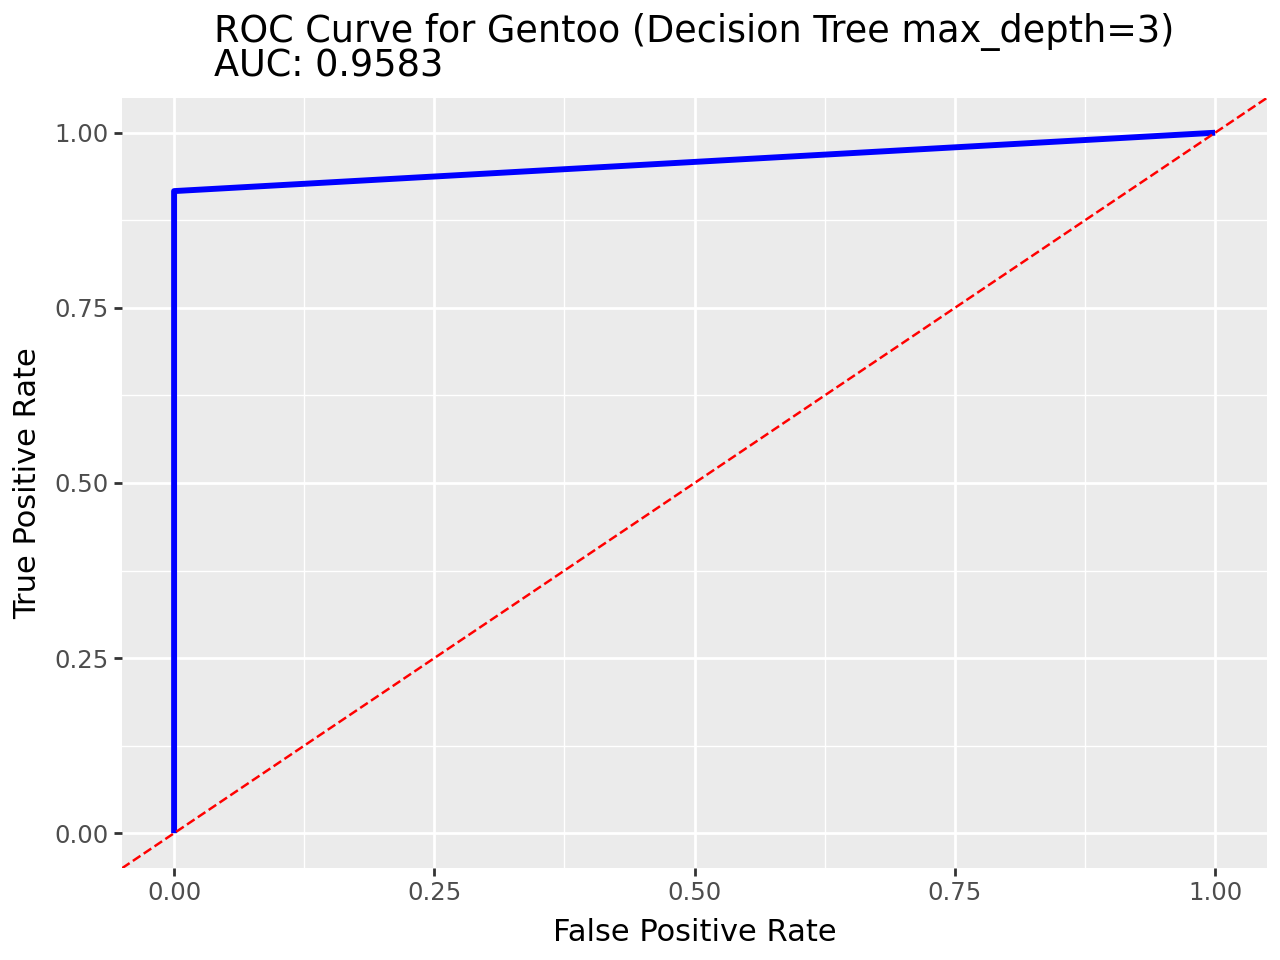

In [19]:
import pandas as pd
from sklearn.metrics import roc_curve
from plotnine import ggplot, aes, geom_line, geom_abline, labs


# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test_gentoo, y_proba_gentoo_dt3)

# dataframe to plot
roc_df = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
})

# ROC curve
plot = (ggplot(roc_df, aes(x='False Positive Rate', y='True Positive Rate'))
        + geom_line(color='blue', size=1.2)
        + geom_abline(intercept=0, slope=1, linetype='dashed', color='red') # Diagonal reference line
        + labs(
            title=f'ROC Curve for Decision Tree max_depth=3\nAUC: {auc_gentoo_dt3:.4f}',
            x='False Positive Rate',
            y='True Positive Rate'
        ))

plot